In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

In [2]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from hist_utils import *
import CMS_lumi
import scipy.stats

Welcome to JupyROOT 6.20/02


In [3]:
def make_pdf(h):

    sumOverY = {}
    for ix in range(1, h.GetNbinsX()+1):
        sumOverY[ix] = sum([h.GetBinContent(ix, iy_) for iy_ in range(1, h.GetNbinsY()+1)])
        for iy in range(1, h.GetNbinsY()+1):
            binc = h.GetBinContent(ix, iy)
            if sumOverY[ix] > 0.:
                h.SetBinContent(ix, iy, binc/sumOverY[ix])

    return h

In [4]:
#year = '2016'
year = '2017'
#year = '2018'
kdata = 'data%s'%year
kmc = 'bg%s-dy'%year
#kmc = 'data2017'
#kmc = 'data2018'
samples = [kdata, kmc]
#samples = ['data2017']
#ma, wgt = {}, {}
ma, pt, eta, pu = {}, {}, {}, {}
eta_range = 'cntr'
eta_range = 'mid'
eta_range = 'fwd'
eta_range = None
era = 'ZeeSel-Era16Feb2021-Zeev1' #massreg paper only
#era = 'ZeeSel-Era16Feb2021-Zeev2' #h4g

#fma.write('%f:%f:%f:%f\n'%(tree.ma[idx], tree.phoCalibEt[idx], tree.phoEta[idx], pu_))
print('>> Doing |eta| range:',eta_range)

for s in samples:
    print('>> For sample:',s)
    
    if s == kdata:
        in_files = glob.glob('Templates/%s/%s-Run%s*_ma1.txt'%(era, s, year))
    else:
        if 'dy' in s:
            in_files = glob.glob('Templates/%s/%s*_ma1.txt'%(era,s))
        else:
            #in_files = glob.glob('Templates/%s/%s-Run2018*_ma1.txt'%(era, s))
            in_files = glob.glob('Templates/%s/%s-Run*_ma1.txt'%(era, s))
    print('>> input files:')
    for in_file in in_files:
        print('   .. input file:',in_file)
    
    #'''
    ma[s], pt[s], eta[s], pu[s] = [], [], [], []
    for in_file in in_files:
        f = open(in_file, "r")
        for i,l in enumerate(f):
            ma_, pt_, eta_, pu_ = l.replace('\n','').split(':')
            eta_ = float(eta_)
            if eta_range == 'cntr':
                if abs(eta_) > 0.5: continue
            elif eta_range == 'mid':
                if abs(eta_) <= 0.5 or abs(eta_) > 1.00: continue
            elif eta_range == 'fwd':
                if abs(eta_) <= 1.0 or abs(eta_) > 1.44: continue
            ma[s].append(float(ma_))
            pt[s].append(float(pt_))
            eta[s].append(float(eta_))
            pu[s].append(float(pu_))
            #if i >= 100000: break
            #if len(ma[s]) >= 1000000: break

    ma[s] = np.array(ma[s])
    pt[s] = np.array(pt[s])
    eta[s] = np.array(eta[s])
    pu[s] = np.array(pu[s])
    
    #pt[s] = pt[s][ma[s] > -0.2]
    #ma[s] = ma[s][ma[s] > -0.2]
    assert len(ma[s] == pt[s])
    print('   .. N_e:',len(ma[s]))
    print('   .. ma[:5]:',ma[s][:5])
    print('   .. pt[:5]:',pt[s][:5])
    #'''

>> Doing |eta| range: None
>> For sample: data2017
>> input files:
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017B_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017C_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017D_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017E_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017F_ma1.txt
   .. N_e: 19583389
   .. ma[:5]: [-1.       -0.088292 -0.042679  0.094709  0.087735]
   .. pt[:5]: [27.37306  31.083309 43.18013  37.664272 42.782734]
>> For sample: bg2017-dy
>> input files:
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/bg2017-dy00_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/bg2017-dy01_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/bg2017-dy02_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev1/bg2017-dy03_ma1.txt
   .. N_e: 2707524
   .. ma[:5]: [ 0.186005 

In [ ]:
plt.rcParams["figure.figsize"] = (4,3)

plt.hist(pt[kdata], histtype='step', bins=50, range=(0., 200.), weights=np.ones_like(pt[kdata])/len(pt[kdata]))
plt.hist(pt[kmc], histtype='step', bins=50, range=(0., 200.), weights=np.ones_like(pt[kmc])/len(pt[kmc]))
plt.show()

plt.hist(eta[kdata], histtype='step', bins=50, range=(-2.6, 2.6), weights=np.ones_like(eta[kdata])/len(eta[kdata]))
plt.hist(eta[kmc], histtype='step', bins=50, range=(-2.6, 2.6), weights=np.ones_like(eta[kmc])/len(eta[kmc]))
plt.show()

plt.hist(pu[kdata], histtype='step', bins=50, range=(0., 80.), weights=np.ones_like(pu[kdata])/len(pu[kdata]))
plt.hist(pu[kmc], histtype='step', bins=50, range=(0., 80.), weights=np.ones_like(pu[kmc])/len(pu[kmc]))
plt.show()

print(pu[kdata].max(), pu[kmc].max())

In [ ]:
pt_bins_ = {}
pt_bins_[0] = [10]
pt_bins_[1] = np.arange(20, 90, 2)
pt_bins_[2] = np.arange(90, 140, 10)
pt_bins_[3] = np.arange(140, 180, 20)
pt_bins_[4] = np.arange(180, 1500+1320, 1320)
#pt_bins_[4] = np.arange(500, 1500+1000, 1000)
pt_bins = [pt_bins_[i] for i in pt_bins_]
pt_bins = np.concatenate(pt_bins).flatten()
pt_bins
#print(pt['data2017'].max())

In [ ]:
#'''
h, c = {}, {}

eta_edge = 2.4
#pt_lo, pt_hi = 20., 200.

s = kdata
k = 'etavpt'+s
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    h[k].Fill(p, e)
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()

s = kmc
k = 'etavpt'+s
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    h[k].Fill(p, e)
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()
#'''
#'''
k = 'etavptdataomc'
#h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['etavpt%s'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['etavpt%s'%kmc])
h[k].GetXaxis().SetRangeUser(10., 100.)
h[k].SetMaximum(10.)
h[k].SetMinimum(1./10.)
h[k].Draw('COL Z')
c[k].Draw()
#'''

In [8]:
def get_ptetawgt(pt_, eta_, h, ceil=10.):

    ipt_  = h.GetXaxis().FindBin(pt_)
    ieta_ = h.GetYaxis().FindBin(eta_)
    wgt = h.GetBinContent(ipt_, ieta_)
    if wgt > ceil:
        wgt = ceil

    return wgt

In [9]:
s = kmc
k = 'etavpt'+s+'corr'
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    #h[k].Fill(p, e)
    h[k].Fill(p, e, get_ptetawgt(p,e,h['etavptdataomc']))
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()
#'''
#'''
k = 'etavptdataomc'+'corr'
#h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['etavpt%s'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['etavpt%scorr'%kmc])
h[k].GetXaxis().SetRangeUser(10., 100.)
h[k].SetMaximum(1.+0.1)
h[k].SetMinimum(1.-0.1)
h[k].Draw('COL Z')
c[k].Draw()
#'''

KeyboardInterrupt: 

In [ ]:
#h, c = {}, {}

#dM = 25
dM = 10
#dM = 100
ma_bins = np.arange(0,1400+dM,dM)-200
#ma_bins = np.arange(150,350+dM,dM)-200
#ma_bins = list(range(0,1200+dM,dM))
#ma_bins = [-400]+ma_bins
#ma_bins = [-400, -200]+ma_bins
ma_bins = [float(m)/1.e3 for m in ma_bins]
#print(len(ma_bins))
n_ma_bins = len(ma_bins)-1
ma_bins = array('d', ma_bins)
#print(ma_bins)

k = kmc+'nopucorr'
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 400, 400)
kpu = k+'pu'
h[kpu] = ROOT.TH1F(kpu, kpu, 20, 0., 100.)
for i,m in enumerate(ma[kmc]):
    #if i+1 >= 100000: break
    #m = (1./0.97)*(m - 0.006)
    #m = 1.036*m - 0.005
    #m = 0.946*m
    #m = 1.01*np.random.normal(m, 0.012) # with correction
    #h[k].Fill(m, wgt['DYToEE'][i])
    #h[k].Fill(m)
    wgt = get_ptetawgt(pt[kmc][i], eta[kmc][i], h['etavptdataomc'])
    h[k].Fill(m, wgt)
    h[kpu].Fill(pu[kmc][i], wgt)
h[k].Draw("hist")
c[k].cd()
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

k = kdata
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
#c[k] = ROOT.TCanvas(k, k, 600, 400)
kpu = k+'pu'
h[kpu] = ROOT.TH1F(kpu, kpu, 20, 0., 100.)
for i,m in enumerate(ma[k]):
    #if i+1 >= 100000: break
    h[k].Fill(m)
    h[kpu].Fill(pu[k][i])
#h[k].Draw("hist")
h[k].Draw("hist same")
#c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

In [ ]:
print(h[kdata].GetMaximum())
print(h[kdata].GetMaximumBin())
print(h[kdata].GetXaxis().FindBin(0.))
print(ma_bins)
print(ma_bins[21-1])
print(ma_bins[25-1])
print(ma_bins[25+4-1])
print(ma_bins[10:34])

In [ ]:
k = kmc+'nopucorr'
kpu = k+'pu'
c[kpu] = ROOT.TCanvas(kpu, kpu, 400, 400)
h[kpu].Draw("hist")
c[kpu].Draw()

k = kdata
kpu = k+'pu'
c[kpu] = ROOT.TCanvas(kpu, kpu, 400, 400)
h[kpu].Draw("hist")
c[kpu].Draw()

k = 'pudataomc'
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['%spu'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h[kmc+'nopucorr'+'pu'])
h[k].Draw('hist')
c[k].Draw()

In [ ]:
def get_puwgt(pu_, h):
    ipu_ = h.GetXaxis().FindBin(pu_)
    wgt = h.GetBinContent(ipu_)
    return wgt

In [ ]:
hdata, _ = np.histogram(ma[kdata], bins=ma_bins)
print(hdata.sum())

dywgts_pteta_pu = [get_ptetawgt(pt[kmc][i], eta[kmc][i], h['etavptdataomc'])*get_puwgt(pu[kmc][i], h['pudataomc']) for i,_ in enumerate(ma[kmc])]
print(len(dywgts_pteta_pu), len(ma[kmc]))

In [6]:
plt.rcParams["figure.figsize"] = (4,3)
'''
def get_chisq(data, mc):
    #assert np.floor(data.sum()) == np.floor(mc.sum()), 'data:%f vs mc:%f'%(np.floor(data.sum()), np.floor(mc.sum()))
    chisq = (data - mc)**2.
    chisq = chisq/data
    chisq = chisq.sum()#/len(mc)-1
    return chisq

#def get_KS(data, mc, do_trunc=True):
def get_tests(data, mc, it):
    #print(data[:34])
    #print(mc[:34])
    assert data.sum()-mc.sum() < 1.
    #print(data.sum(), mc.sum())
    data = np.float32(data)/data.sum()
    mc = np.float32(mc)/mc.sum()
    
    chisq = get_chisq(data, mc)
    sumabs = np.sum(np.abs(data-mc))
    ks = np.max(np.abs(np.cumsum(data)-np.cumsum(mc)))

    #print('sum abs(diff): %E'%np.sum(np.abs(data-mc)))
    #print('chisq: %E'%chisq)
    #print('KS: %E'%np.max(np.abs(np.cumsum(data)-np.cumsum(mc))))
    #for i,m in enumerate(ma_bins):
    #    #print(i, m, data[i], mc[i], data[i]-mc[i])
    #    if i >= 34: break
    #if do_trunc:
    data = data[10:34+1]
    mc = mc[10:34+1]
    #data = np.float32(data)/data.sum()
    #mc = np.float32(mc)/mc.sum()
    #for i,m in enumerate(ma_bins):
    #    if i+10 >= 34: break
    #    print(i+10, ma_bins[i+10], data[i], mc[i], np.abs(data[i]-mc[i]))
    if it == 0:
        plt.plot(data, label='data')
        plt.plot(mc, label='mc')
        plt.legend()
        plt.show()
    #print('sum abs(diff), trunc: %E'%np.sum(np.abs(data-mc)))
    #print('chisq, trunc: %E'%get_chisq(data, mc))
    #print(np.abs(data-mc))
    #data = np.cumsum(data)
    #mc = np.cumsum(mc)
    #print(data[-1], mc[-1])
    #print(np.abs(data-mc))
    #return np.max(np.abs(data-mc))
    #print('KS, trunc: %E'%np.max(np.abs(np.cumsum(data)-np.cumsum(mc))))

    chisq_trunc = get_chisq(data, mc)
    sumabs_trunc = np.sum(np.abs(data-mc))
    ks_trunc = np.max(np.abs(np.cumsum(data)-np.cumsum(mc)))
    return [chisq, sumabs, ks, chisq_trunc, sumabs_trunc, ks_trunc]
'''
def shift_ma(scale, smear, it):
    if smear == 0.:
        ma_ = scale*ma[kmc]
    else:
        #ma_ = scale*np.array([np.random.normal(m, smear) for m in ma[kmc]])
        ma_ = np.array([np.random.normal(scale*m, smear) for m in ma[kmc]])
    hmc_shift, _ = np.histogram(ma_, bins=ma_bins, weights=dywgts_pteta_pu)
    hmc_shift = np.float64(hmc_shift)
    #hmc_shift *= (h['Run2017'].Integral()/hmc_shift.sum())
    hmc_shift *= (hdata.sum()/hmc_shift.sum())
    #return get_chisq(hdata, hmc_shift)
    #return get_KS(hdata, hmc_shift)
    #return get_tests(hdata, hmc_shift, it)
    #print('hdata.sum:',hdata.sum(), 'hmc_shift.sum:',hmc_shift.sum())
    chisq, _ = scipy.stats.chisquare(hdata, hmc_shift)
    #print(chisq, len(hdata))
    return [chisq, 0., 0., chisq/(len(hdata)-1.), 0., 0.]

In [16]:
# Do grid search

#do_coarse = True
do_coarse = False

dS = 2
dS = 4
steps = np.arange(dS,5*dS + dS,dS)/1.e4
if do_coarse:
    scale_nom = 1.
    smear_nom = 0.
    #scales_ = np.concatenate([[-0.004], np.arange(0,56+8,8)/1.e3])
    scales_ = np.concatenate([[-0.004], np.arange(0,56+4,4)/1.e3])
    #smears_ = np.concatenate([np.arange(0,20+4,4)/1.e3])
    #scales_ = np.concatenate([[-0.036, -0.032, -0.028, -0.024, -0.020, -0.016, -0.012, -0.008, -0.004], np.arange(0,0+4,4)/1.e3])#8+4
    #scales_ = np.concatenate([[-0.008, -0.004], np.arange(0,12+4,4)/1.e3])#8+4
    #smears_ = np.concatenate([np.arange(0,20+4,4)/1.e3])
    smears_ = np.concatenate([np.arange(0,20+2,2)/1.e3])
else:
    scale_nom = 1.04 # use values from coarse scan
    smear_nom = 0.00 # use values from coarse scan
    scales_ = np.concatenate([-np.flip(steps), [0.], steps])
    smears_ = np.concatenate([-np.flip(steps), [0.], steps])

smears_ = np.array([sm for sm in smears_ if smear_nom+sm >= 0.])[:-2] # only allow positive smearing
chisqs_ = np.zeros((len(scales_), len(smears_)))
chisqtruncs_ = np.zeros((len(scales_), len(smears_)))
chisqs_stdev_ = np.zeros((len(scales_), len(smears_)))
chisqtruncs_stdev_ = np.zeros((len(scales_), len(smears_)))
print(steps)
print(scales_)
print(smears_)
n = 0
for a,s in enumerate(scales_):
    for b,sm in enumerate(smears_):
        n += 1
        #if n < 210: continue
        print('=======================')
        print('iteration: %d / %d'%(n, len(scales_)*len(smears_)))
        scale = scale_nom + s
        smear = smear_nom + sm
        print('scale:',scale)
        print('smear:',smear)
        #'''
        #ks_test = [shift_ma(scale, smear) for i in range(10)]
        #print('chisq: %E +/- %E'%(np.mean(ks_test),np.std(ks_test)))
        #break
        tests = np.array([shift_ma(scale, smear, i) for i in range(10 if do_coarse else 5)])
        #break
        #print(tests.shape)
        print('chisq:  %E +/- %E'%(np.mean(tests[:,0]),np.std(tests[:,0])))
        #print('sumabs: %E +/- %E'%(np.mean(tests[:,1]),np.std(tests[:,1])))
        #print('ks:     %E +/- %E'%(np.mean(tests[:,2]),np.std(tests[:,2])))
        #print('-----------------------')
        #print('chisq, trunc:  %E +/- %E'%(np.mean(tests[:,3]),np.std(tests[:,3])))
        #print('sumabs, trunc: %E +/- %E'%(np.mean(tests[:,4]),np.std(tests[:,4])))
        #print('ks, trunc:     %E +/- %E'%(np.mean(tests[:,5]),np.std(tests[:,5])))
        chisqs_[a,b] = np.mean(tests[:,0])
        #chisqtruncs_[a,b] = np.mean(tests[:,3])
        chisqs_stdev_[a,b] = np.std(tests[:,0])
        #chisqtruncs_stdev_[a,b] = np.std(tests[:,3])
        #print('-----------------------')
        #'''
        #break
    #break
print('>> Done.')

[0.0004 0.0008 0.0012 0.0016 0.002 ]
[-0.002  -0.0016 -0.0012 -0.0008 -0.0004  0.      0.0004  0.0008  0.0012
  0.0016  0.002 ]
[0.     0.0004 0.0008 0.0012]
iteration: 1 / 44
scale: 1.038
smear: 0.0
chisq:  1.936583E+04 +/- 0.000000E+00
iteration: 2 / 44
scale: 1.038
smear: 0.0004
chisq:  1.940063E+04 +/- 2.977889E+01
iteration: 3 / 44
scale: 1.038
smear: 0.0008
chisq:  1.939774E+04 +/- 1.123821E+02
iteration: 4 / 44
scale: 1.038
smear: 0.0012
chisq:  1.940733E+04 +/- 1.591425E+02
iteration: 5 / 44
scale: 1.0384
smear: 0.0
chisq:  1.923518E+04 +/- 0.000000E+00
iteration: 6 / 44
scale: 1.0384
smear: 0.0004
chisq:  1.935695E+04 +/- 2.734506E+01
iteration: 7 / 44
scale: 1.0384
smear: 0.0008
chisq:  1.929814E+04 +/- 1.728993E+01
iteration: 8 / 44
scale: 1.0384
smear: 0.0012
chisq:  1.938530E+04 +/- 1.338733E+02
iteration: 9 / 44
scale: 1.0388
smear: 0.0
chisq:  1.925691E+04 +/- 0.000000E+00
iteration: 10 / 44
scale: 1.0388
smear: 0.0004
chisq:  1.925902E+04 +/- 5.084873E+01
iteration: 11 

In [7]:
# Using full distn

#print(scales_)
#print(smears_)
#chisqs_stdev_ = chisqs_stdev_/chisqs_.max()
#chisqs_ = chisqs_/chisqs_.max()
print(np.flipud(chisqs_))
print(np.flipud(chisqs_stdev_))

lvls_ = np.sort(chisqs_.flatten())
lvls_ = [lvls_[i] for i in range(1, len(lvls_), len(lvls_)//10)]
minargs = tuple(np.argwhere(chisqs_ == chisqs_.min())[0])
it_ = np.argwhere(chisqs_.flatten() == chisqs_.min())[0]
print('>> arg@min:',minargs)
print('>> %d: scale@min: %4.3f, smear@min: %4.3f, chisq@min: %E +/- %E [c.f %E]'%(it_+1, scale_nom+scales_[minargs[0]], smear_nom+smears_[minargs[1]], chisqs_[minargs], chisqs_stdev_[minargs], chisqtruncs_[minargs]))
#lvls_ = np.linspace(chisqs_.min(), chisqs_.max(), 25)
plt.contour(smear_nom+smears_, scale_nom+scales_, chisqs_, levels=lvls_, cmap="RdBu_r")
plt.xlabel('smear')
plt.ylabel('scale')
plt.show()
#>> 45: scale@min: 0.992, smear@min: 0.008, chisq@min: 2.077096E-03 +/- 0.000000E+00 [c.f 1.097946E-03]
uncert = smear_nom+smears_[minargs[1]]

NameError: name 'chisqs_' is not defined

In [5]:
#'''
dS = 4
steps = np.arange(dS,5*dS + dS,dS)/1.e4
scale_nom = 1.04 # use values from coarse scan
smear_nom = 0.00 # use values from coarse scan
scales_ = np.concatenate([-np.flip(steps), [0.], steps])
smears_ = np.concatenate([-np.flip(steps), [0.], steps])
smears_ = np.array([sm for sm in smears_ if smear_nom+sm >= 0.])[:-2]
#'''
#np.savez('chisq_scale1p038_1p042v2.npz', chisqs_=chisqs_, chisqs_stdev_=chisqs_stdev_, scales_=scale_nom+scales_, smear_=smear_nom+smears_)

data = np.load('chisq_scale1p038_1p042v2.npz')
chisqs_ = data['chisqs_']
chisqs_stdev_ = data['chisqs_stdev_']
scales_ = data['scales_']
print(scales_)
print(scales_.shape)
#np.array([-0.0016 ,-0.0014 ,-0.0012 ,-0.001  ,-0.0008 ,-0.0006 ,-0.0004 ,-0.0002  ,0.
#  ,0.0002  ,0.0004  ,0.0006 ,0.0008 ,0.001  ,0.0012 ,0.0014 ,0.0016])
smears_ = data['smear_']
#np.array([0.     ,0.0002 ,0.0004 ,0.0006 ,0.0008 ,0.001  ,0.0012 ,0.0014 ,0.0016])
'''
print(chisqs_.shape)
print(scales_.shape)
print(smears_.shape)
print(chisqs_.min(), chisqs_.max())
idx_min = tuple(np.argwhere(chisqs_ == chisqs_.min())[0])
print(idx_min)
stdev_optim = chisqs_stdev_[idx_min]
print(stdev_optim)
'''
minargs = tuple(np.argwhere(chisqs_ == chisqs_.min())[0])
print(scales_[minargs[0]])
print(chisqs_[minargs])
print(chisqs_stdev_[minargs])
uncert = chisqs_stdev_[minargs]

[1.038  1.0384 1.0388 1.0392 1.0396 1.04   1.0404 1.0408 1.0412 1.0416
 1.042 ]
(11,)
1.04
18989.257273968782
0.0


In [6]:
import scipy.stats

#find Chi-Square critical value
cont1 = scipy.stats.chi2.ppf(0.68, 138)
cont2 = scipy.stats.chi2.ppf(0.95, 138)
cont3 = scipy.stats.chi2.ppf(0.997, 138)
conts = [chisqs_.min(), chisqs_.min()+cont1, chisqs_.min()+cont2]#, chisqs_.min()+cont3]
#conts = [chisqs_.min(), chisqs_.min()+uncert, chisqs_.min()+2*uncert, chisqs_.min()+3*uncert]
print(conts)

[18989.257273968782, 19134.48571899484, 19155.672572917847]


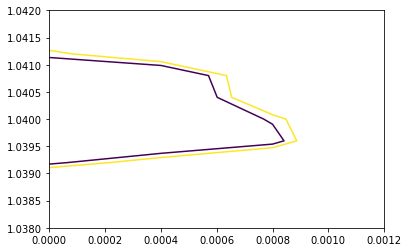

In [7]:
#chisqs_ = chisqs_[::2,::2]
#smears_ = smears_[::2]
#scales_ = scales_[::2]
plt.contour(smears_, scales_, chisqs_, levels=conts)
plt.show()

smears 4 0.0 1.2
scales 11 1.038 1.042
chisq, min,max: 18989.257273968782 19441.124658251465
0.0 1.2
41.5 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: conts
Info in <TCanvas::Print>: pdf file Plots/massreg/v19/DYToEE_data2017obg2017-dy_etaNone_ma1_ptetarwgt_scale-vs-smear.pdf has been created


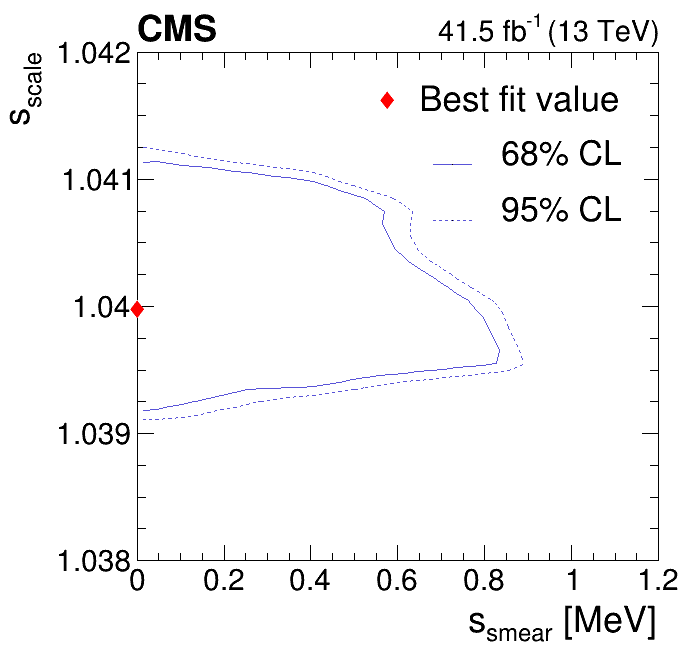

In [22]:
plot_dir = 'Plots/massreg/v19'
print_pdf = False
print_pdf = True
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

#hConts = ROOT.TH2F('hConts', len(smears_)-1, smears_[0], smears_[-1],\
#                             len(scales_)-1, scales_[0], scales_[-1])
c,h = {}, {}

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = ""
CMS_lumi.lumi_sqrtS = "41.5 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
#CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)

smears = 1.e3*np.array(smears_)
scales = 1.*np.array(scales_)

print('smears', len(smears), smears[0], smears[-1])
print('scales', len(scales), scales[0], scales[-1])
print('chisq, min,max:', chisqs_.min(), chisqs_.max())

k = 'conts'
#c[k] = ROOT.TCanvas(k, k, 680, 600)
#c[k] = ROOT.TCanvas(k, k, 640, 680)
#c[k] = ROOT.TCanvas(k, k, 697, 680)
c[k] = ROOT.TCanvas(k, k, 690, 680)
#h[k] = ROOT.TH2F(k, k, len(smears)-1, array('d', smears),\
#                       len(scales)-1, array('d', scales))
h[k] = ROOT.TH2F(k, k, len(smears)-1, 0., 1.2,\
                       len(scales)-1, 0.038+1, 0.042+1)
h[k+'graph'] = ROOT.TGraph2D()
#h[k+'graph'] = h[k].Clone()
#h[k+'graph'].SetName(k+'graph')
h[k+'optim'] = ROOT.TGraph2D()
i = 0
for a in range(len(scales)):
    for b in range(len(smears)):
        #h[k].SetBinContent(b+1, a+1, chisqs_[a,b])
        h[k].SetBinContent(b+1, a+1, 0.)
        #print(a, b, scales[a], smears[b], chisqs_[a,b])
        h[k+'graph'].SetPoint(i, smears[b], scales[a], chisqs_[a,b])
        #h[k+'graph'].SetBinContent(b+1, a+1, chisqs_[a,b])
        #if a == 4 and b == 1:
        if a == len(scales)//2 and b == 1:
            h[k+'optim'].SetPoint(i, smears[b], scales[a], chisqs_[a,b])
        else:
            h[k+'optim'].SetPoint(i, smears[b], scales[a], 0.)
        i += 1
    #break

'''
# Dont work
#h[k+'optim'] = ROOT.TGraph2D()
#h[k+'p'] = ROOT.TH2F(k+'p', k+'p', len(smears)-1, 0., 20.,\
#                       len(scales)-1, -0.4, 5.6)
#h[k+'optim'].SetPoint(0, 0., 4.2, 25.e3) # (i, x, y, z)
#h[k+'optim'].SetPoint(1, 0., 4.2, 25.e3) # (i, x, y, z)
#h[k+'p'].SetBinContent(0, 4, -25.e3)
'''
'''
contours[6];
contours[0] = -0.7;
contours[1] = -0.5;
contours[2] = -0.1;
contours[3] =  0.1;
contours[4] =  0.4;
contours[5] =  0.8;
HistStreamFn->SetContour(6, contours);
#h[k+'graph'].SetContour(6)
'''
#h[k+'graph']
#ROOT.gStyle.SetContour(len(conts), array('d', conts))
ROOT.gStyle.SetNumberContours(10) # default:20
ROOT.TGaxis.fgMaxDigits = 3
ROOT.gStyle.SetOptStat(0)

#h[k] = set_hist(h[k], "#Deltasmear [MeV]", "#Deltascale [%]", "")
h[k] = set_hist(h[k], "s_{smear} [MeV]", "s_{scale}", "")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.2)
#ROOT.gPad.SetRightMargin(0.19) # with colz
ROOT.gPad.SetRightMargin(0.04) # without colz
ROOT.gStyle.SetPalette(55)#53
ROOT.TGaxis.fgMaxDigits = 3
h[k].SetTitle('')

h[k].GetYaxis().SetTitleOffset(1.7)
h[k].GetYaxis().SetLabelOffset(0.01)
h[k].GetYaxis().SetTitleSize(0.06)
h[k].GetYaxis().SetLabelSize(0.05)
h[k].GetYaxis().SetLabelFont(42)
h[k].GetYaxis().SetTitleFont(42)
h[k].GetYaxis().SetMaxDigits(3)
#h[k].GetYaxis().SetNdivisions(-606)
h[k].GetYaxis().SetNdivisions(-404)

h[k].GetZaxis().SetTitle('#chi^{2}')
h[k].GetZaxis().SetTitleOffset(1.4)
h[k].GetZaxis().SetTitleSize(0.06)
h[k].GetZaxis().SetTitleFont(42)
h[k].GetZaxis().SetLabelSize(0.05)
h[k].GetZaxis().SetLabelFont(42)

h[k].GetXaxis().SetTitleOffset(1.0)
h[k].GetXaxis().SetTitleSize(0.06)
h[k].GetXaxis().SetLabelSize(0.05)
h[k].GetXaxis().SetLabelFont(42)
h[k].GetXaxis().SetTitleFont(42)
#h[k].GetXaxis().SetRangeUser(0., 1.2)
print(smears[0], smears[-1])

#h[k].SetMinimum(chisqs_.min()) 
#h[k].SetMaximum(130.e3)    
#h[k].Draw("COL Z")
h[k].Draw("COL")

# Workaround: Draw graph on top of empty hist
# otherwise axes arent drawn
#h[k+'graph'].GetZaxis().SetTitle('#chi^{2}')
#h[k+'graph'].GetZaxis().SetTitleOffset(1.3)
#h[k+'graph'].GetZaxis().SetTitleSize(0.05)
#h[k+'graph'].GetZaxis().SetTitleFont(62)
#h[k+'graph'].GetZaxis().SetLabelSize(0.04)
#h[k+'graph'].GetZaxis().SetLabelFont(62)
#h[k+'graph'].Draw("CONT1 same")
#h[k+'graph'].Draw("CONT2 same")
# 68% contour
h[k+'hist'] = h[k+'graph'].GetHistogram()
h[k+'hist'].SetLineStyle(1) 
h[k+'hist'].SetLineColor(9) #9
#h[k+'hist'].SetContour(len(conts), array('d', conts))
h[k+'hist'].SetContour(len(conts[:2]), array('d', conts[:2]))
h[k+'hist'].GetYaxis().SetNdivisions(-404)
h[k+'hist'].Draw("CONT3 same")
# 95% contour
h[k+'hist2'] = h[k+'hist'].Clone()
h[k+'hist2'].SetName(k+'graph3')
h[k+'hist2'].SetLineStyle(2) 
h[k+'hist2'].SetLineColor(9) #9
h[k+'hist2'].SetContour(len(conts[1:]), array('d', conts[1:]))
#h[k+'hist2'].GetYaxis().SetNdivisions(-404)
h[k+'hist2'].Draw("CONT3 same")

# Draw optimial point
optim = ROOT.TLatex()
#optim.DrawLatex(0., 4.2, '#times')
# best-fit marker
#optim.DrawLatex(0., 1+39.925e-3, '#color[9]{#times}') #39.975e-3 #40
optim.DrawLatex(-0.025, 1+39.91e-3, '#color[2]{#diamond}') #39.975e-3 #40 [9]
optim.SetTextFont(42)
# best-fit legend
optim.DrawLatex(0.55, 1+41.56e-3, '#color[2]{#diamond}') #39.975e-3 #40 [9]
#optim.SetTextSize(0.045)
#optim.DrawLatex(0.737, 1+41.59e-3, 'Best-fit value') #39.975e-3 #40
optim.SetTextSize(0.0585)
optim.DrawLatex(0.65, 1+41.53e-3, 'Best fit value') #39.975e-3 #40
#optim.SetTextSize(0.05)
#optim.DrawLatex(0.737, 1+39.1e-3, 'Best-fit value') #39.975e-3 #40
#optim.DrawLatex(0.1, 1.045, '#color[9]{#times} Best-fit value') #39.975e-3 #40

legend = {}
#legend[k] = ROOT.TLegend(0.62,0.67,0.94,0.81) #(x1, y1, x2, y2)
legend[k] = ROOT.TLegend(0.62,0.62,0.94,0.79) #(x1, y1, x2, y2)
#legend[k] = ROOT.TLegend(0.62,0.16,0.94,0.16+0.16) #(x1, y1, x2, y2)
legend[k].AddEntry(h[k+'hist'].GetName(), "68% CL")
legend[k].AddEntry(h[k+'hist2'].GetName(), "95% CL")
legend[k].SetBorderSize(0)
legend[k].SetTextFont(42)
legend[k].SetTextAlign(23)
legend[k].Draw("same")

CMS_lumi.cmsTextOffset = 0.
iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.21
iPeriod = 0

c[k].Draw()
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Update()
if print_pdf: c[k].Print('%s/DYToEE_%so%s_eta%s_ma1_ptetarwgt_scale-vs-smear.pdf'%(plot_dir, kdata, kmc, eta_range))


18998.0591966
19412.6008711


Info in <TCanvas::Print>: pdf file Plots/massreg/v15/chi2_smear_scale.pdf has been created


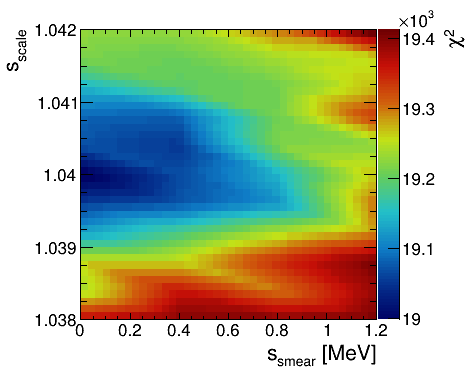

In [39]:
hproj = {}
cproj = {}

k = 'src'
hproj[k] = h['contsgraph'].GetHistogram()
hproj[k].SetName(k)

cproj[k] = ROOT.TCanvas(k, k, 480, 400)
hproj[k] = set_hist(hproj[k], "s_{smear} [MeV]", "s_{scale}", "")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.17)
ROOT.gPad.SetRightMargin(0.21) # with colz
#ROOT.gPad.SetRightMargin(0.04) # without colz
ROOT.gStyle.SetPalette(55)#53
ROOT.TGaxis.fgMaxDigits = 3
hproj[k].SetTitle('')

hproj[k].GetYaxis().SetTitleOffset(1.4)
hproj[k].GetYaxis().SetLabelOffset(0.01)
hproj[k].GetYaxis().SetTitleSize(0.06)
hproj[k].GetYaxis().SetLabelSize(0.05)
hproj[k].GetYaxis().SetLabelFont(42)
hproj[k].GetYaxis().SetTitleFont(42)
hproj[k].GetYaxis().SetMaxDigits(3)
#hproj[k].GetYaxis().SetNdivisions(-606)
hproj[k].GetYaxis().SetNdivisions(-404)

hproj[k].GetZaxis().SetTitle('#chi^{2}')
hproj[k].GetZaxis().SetTitleOffset(1.2)
hproj[k].GetZaxis().SetTitleSize(0.06)
hproj[k].GetZaxis().SetTitleFont(42)
hproj[k].GetZaxis().SetLabelSize(0.05)
hproj[k].GetZaxis().SetLabelFont(42)
hproj[k].GetZaxis().SetMaxDigits(3)
hproj[k].GetZaxis().SetNdivisions(405)

hproj[k].GetXaxis().SetTitleOffset(1.0)
hproj[k].GetXaxis().SetTitleSize(0.06)
hproj[k].GetXaxis().SetLabelSize(0.05)
hproj[k].GetXaxis().SetLabelFont(42)
hproj[k].GetXaxis().SetTitleFont(42)

print(hproj[k].GetMinimum())
print(hproj[k].GetMaximum())

#i, j = 0, 1
#hproj[k] = 
hproj[k].SetContour(100)
hproj[k].Draw('COLZ')

#palette = hproj[k].GetListOfFunctions().FindObject("palette")
#palette.SetX1NDC(0.795)
#palette.SetX2NDC(0.845)
#palette.SetY2NDC(0.92)
#palette.SetY1NDC(0.139)

cproj[k].Draw()

cproj[k].Print('%s/chi2_smear_scale.pdf'%(plot_dir))

40
40
0.0
24000.0


Warning in <TROOT::Append>: Replacing existing TH1: x (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: x
Info in <TCanvas::Print>: pdf file Plots/massreg/v15/chi2_proj_scale_best-smear.pdf has been created


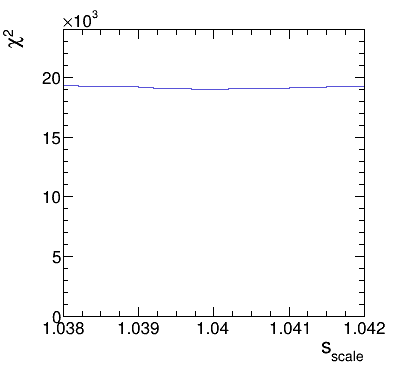

In [43]:
k = 'x'

dozoom = False
#dozoom = True

print(hproj['src'].GetNbinsX())
print(hproj['src'].GetNbinsY())
#hproj[k] = hproj['src'].ProjectionX(k, 20, 21)
hproj[k] = hproj['src'].ProjectionY(k, 1, 1)
cproj[k] = ROOT.TCanvas(k, k, 400, 400)
ymax = 1.2*hproj[k].GetMaximum()
ROOT.gPad.SetBottomMargin(0.15)
ROOT.gPad.SetLeftMargin(0.16)
ROOT.gPad.SetRightMargin(0.08)
ROOT.gPad.SetTopMargin(0.08)
#ROOT.gPad.SetBottomMargin(0.1)

hproj[k].GetYaxis().SetTitle('#chi^{2}')
#hproj[k].GetYaxis().SetLabelOffset(0.01)
hproj[k].GetYaxis().SetTitleSize(0.06)
hproj[k].GetYaxis().SetLabelSize(0.05)
hproj[k].GetYaxis().SetLabelFont(42)
hproj[k].GetYaxis().SetTitleFont(42)
hproj[k].GetYaxis().SetTitleOffset(1.3)
if dozoom:
    hproj[k].GetYaxis().SetRangeUser(18.8e3, 19.5e3)
else:
    hproj[k].GetYaxis().SetRangeUser(0., 24.e3)

hproj[k].GetYaxis().SetMaxDigits(3)
#hproj[k].GetYaxis().SetNdivisions(-606)
#hproj[k].GetYaxis().SetNdivisions(-402)
hproj[k].GetYaxis().SetNdivisions(505)

hproj[k].GetXaxis().SetTitleSize(0.06)
hproj[k].GetXaxis().SetLabelSize(0.05)
hproj[k].GetXaxis().SetLabelFont(42)
hproj[k].GetXaxis().SetTitleFont(42)
hproj[k].GetXaxis().SetTitleOffset(1.)

print(hproj[k].GetMinimum())
print(hproj[k].GetMaximum())

#hproj[k].GetYaxis().SetRangeUser(0, ymax)
hproj[k].SetLineColor(9)
hproj[k].Draw('hist')
cproj[k].Draw()

cproj[k].Print('%s/chi2_proj_scale_best-smear%s.pdf'%(plot_dir, '_zoom' if dozoom else ''))

40
40


Warning in <TROOT::Append>: Replacing existing TH1: y (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: y
Info in <TCanvas::Print>: pdf file Plots/massreg/v15/chi2_proj_smear_best-scale.pdf has been created


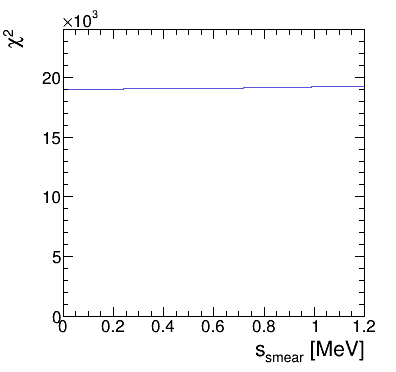

In [44]:
k = 'y'

print(hproj['src'].GetNbinsX())
print(hproj['src'].GetNbinsY())
hproj[k] = hproj['src'].ProjectionX(k, 20, 20)
#hproj[k] = hproj['src'].ProjectionY(k, 1, 2)
cproj[k] = ROOT.TCanvas(k, k, 400, 400)
ymax = 1.2*hproj[k].GetMaximum()
ROOT.gPad.SetBottomMargin(0.15)
ROOT.gPad.SetLeftMargin(0.16)
ROOT.gPad.SetRightMargin(0.08)
ROOT.gPad.SetTopMargin(0.08)
#ROOT.gPad.SetBottomMargin(0.1)

hproj[k].GetYaxis().SetTitle('#chi^{2}')
#hproj[k].GetYaxis().SetLabelOffset(0.01)
hproj[k].GetYaxis().SetTitleSize(0.06)
hproj[k].GetYaxis().SetLabelSize(0.05)
hproj[k].GetYaxis().SetLabelFont(42)
hproj[k].GetYaxis().SetTitleFont(42)
hproj[k].GetYaxis().SetTitleOffset(1.3)
#hproj[k].GetYaxis().SetRangeUser(37.e3, 39.e3)
if dozoom:
    hproj[k].GetYaxis().SetRangeUser(18.8e3, 19.5e3)
else:
    hproj[k].GetYaxis().SetRangeUser(0., 24.e3)

hproj[k].GetYaxis().SetMaxDigits(3)
#hproj[k].GetYaxis().SetNdivisions(-606)
#hproj[k].GetYaxis().SetNdivisions(-402)
hproj[k].GetYaxis().SetNdivisions(505)

hproj[k].GetXaxis().SetTitleSize(0.06)
hproj[k].GetXaxis().SetLabelSize(0.05)
hproj[k].GetXaxis().SetLabelFont(42)
hproj[k].GetXaxis().SetTitleFont(42)
hproj[k].GetXaxis().SetTitleOffset(1.)

#hproj[k].GetYaxis().SetRangeUser(0, ymax)
hproj[k].SetLineColor(9)
hproj[k].Draw('hist')
cproj[k].Draw()

cproj[k].Print('%s/chi2_proj_smear_best-scale%s.pdf'%(plot_dir, '_zoom' if dozoom else ''))

16239381.6711
16203696.0
898.814025879


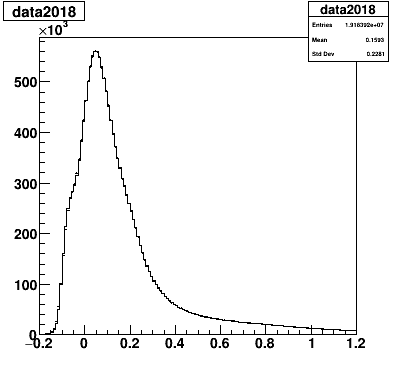

In [15]:
k = kmc
scale_ = 0.996 #0.992
smear_ = 0.008 #GeV
kshift = k+'shift'
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
h[kshift] = ROOT.TH1F(kshift, kshift, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 400, 400)
for i,m in enumerate(ma[k]):
    wgt = get_ptetawgt(pt[k][i], eta[k][i], h['etavptdataomc'])*get_puwgt(pu[k][i], h['pudataomc'])
    h[k].Fill(m, wgt)
    h[kshift].Fill(scale_*np.random.normal(m, smear_), wgt)
h[k].Draw("hist")
h[kshift].Draw('same')
c[k].cd()
c[k].Draw()
print(h[k].Integral())
print(h[kdata].Integral())
print(h[k].GetBinContent(1))

In [16]:
def get_stat_syst_graph(h, k, kshift, ksyst, scale=1.):

    for ib in range(1, h[k].GetNbinsX()+1):
        binc_nom = h[k].GetBinContent(ib)
        binc_shift = h[kshift].GetBinContent(ib)

        binerr_syst = binc_nom - binc_shift
        binerr_stat = h[k].GetBinError(ib)

        if binc_nom > binc_shift:
            binerr_up = binerr_stat
            binerr_dn = scale*np.sqrt(binerr_stat*binerr_stat + binerr_syst*binerr_syst)
        else:
            binerr_up = scale*np.sqrt(binerr_stat*binerr_stat + binerr_syst*binerr_syst)
            binerr_dn = binerr_stat

        if ib <= 2: print(ib, h[k].GetBinCenter(ib), binc_nom, binerr_stat, binerr_syst, ib-1, binerr_up, binerr_dn)
        h[ksyst].SetPoint(ib-1, h[k].GetBinCenter(ib), binc_nom)
        h[ksyst].SetPointError(
            ib-1,
            h[k].GetBinWidth(ib)/2.,
            h[k].GetBinWidth(ib)/2.,
            binerr_dn,
            binerr_up
            )